# Challenge Técnico (Core) - Elida Peña

**Objetivo:** Los estudiantes deberán participar en una competencia de Kaggle, realizar un análisis completo del dataset, entrenar y evaluar al menos cinco modelos diferentes, y realizar un benchmark para comparar su rendimiento. El resultado final debe ser subido a GitHub.

**Pasos del Challenge:**

**1. Registro en Kaggle y Elección de Competencia:**

* Los estudiantes deben registrarse en Kaggle si no lo han hecho aún.

* Elegir una competencia activa que esté alineada con los conocimientos y técnicas aprendidas (por ejemplo, una competencia de clasificación o regresión).


**2. Carga y Exploración Inicial de Datos:**

* Descargar el dataset de la competencia.

* Realizar una exploración inicial para entender la estructura del dataset y las características disponibles.

* Identificar y documentar valores faltantes y outliers.



**3. Análisis Exploratorio de Datos (EDA):**

* Calcular estadísticas descriptivas básicas.

* Crear visualizaciones para entender la distribución de las variables y sus relaciones.

* Detectar y tratar valores faltantes y outliers.


**4. Preprocesamiento de Datos:**

* Transformar las columnas según sea necesario (codificación de variables categóricas, escalado de características numéricas).

* Dividir el dataset en conjuntos de entrenamiento y prueba.


**5. Implementación de Modelos y Benchmark:**

* Entrenar y evaluar al menos cinco modelos diferentes, como Regresión Logística, K-Nearest Neighbors (KNN), Árbol de Decisión, XGBoost y LightGBM.

* Utilizar validación cruzada para evaluar el rendimiento inicial de los modelos.

* Optimizar los hiperparámetros de los modelos seleccionados utilizando GridSearchCV o RandomizedSearchCV.

* Comparar el rendimiento de los modelos utilizando métricas adecuadas.

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Cargar el dataset y revisar su estructura básica.
# Cargar el dataset
path = "../data/Depression Student Dataset.csv"
df = pd.read_csv(path, sep=',')

# Revisar la estructura básica del dataset
print("Primeras 5 filas del dataset:")
print(df.head())

print("\nInformación del dataset:")
print(df.info())  # Información sobre columnas, tipos de datos y valores nulos.



Primeras 5 filas del dataset:
   Gender  Age  Academic Pressure  Study Satisfaction     Sleep Duration  \
0    Male   28                2.0                 4.0          7-8 hours   
1    Male   28                4.0                 5.0          5-6 hours   
2    Male   25                1.0                 3.0          5-6 hours   
3    Male   23                1.0                 4.0  More than 8 hours   
4  Female   31                1.0                 5.0  More than 8 hours   

  Dietary Habits Have you ever had suicidal thoughts ?  Study Hours  \
0       Moderate                                   Yes            9   
1        Healthy                                   Yes            7   
2      Unhealthy                                   Yes           10   
3      Unhealthy                                   Yes            7   
4        Healthy                                   Yes            4   

   Financial Stress Family History of Mental Illness Depression  
0                 2 

In [5]:
print("\nDescripción estadística básica:")
print(df.describe())  # Estadísticas básicas del dataset.


Descripción estadística básica:
              Age  Academic Pressure  Study Satisfaction  Study Hours  \
count  502.000000         502.000000          502.000000   502.000000   
mean    26.241036           3.003984            3.075697     6.404382   
std      4.896501           1.390007            1.373490     3.742434   
min     18.000000           1.000000            1.000000     0.000000   
25%     22.000000           2.000000            2.000000     3.000000   
50%     26.500000           3.000000            3.000000     7.000000   
75%     30.000000           4.000000            4.000000    10.000000   
max     34.000000           5.000000            5.000000    12.000000   

       Financial Stress  
count        502.000000  
mean           2.928287  
std            1.425053  
min            1.000000  
25%            2.000000  
50%            3.000000  
75%            4.000000  
max            5.000000  


In [3]:
print(df.columns)

Index(['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


In [6]:
# Detectar valores duplicados
duplicados = df.duplicated()
#Imprime la cantidad de numeros duplicados
print(f"Número de filas duplicadas: {duplicados.sum()}")
df.head()

Número de filas duplicadas: 0


,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


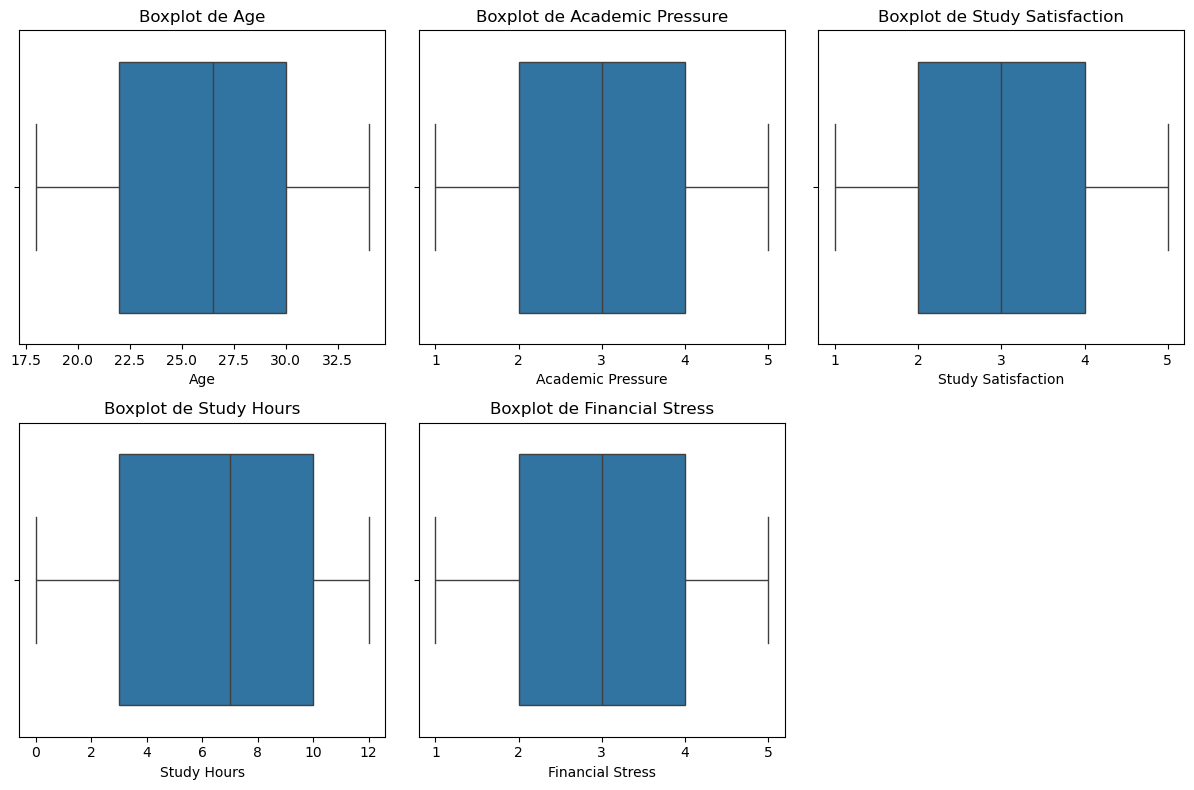

Valores faltantes en cada columna:
Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [9]:
missing_values = df.isnull().sum()
# Identificar outliers con boxplots para las variables numéricas
numerical_columns = ['Age', 'Academic Pressure', 'Study Satisfaction', 'Study Hours', 'Financial Stress']

# Visualización de outliers
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

# Mostrar valores faltantes
print(f"Valores faltantes en cada columna:\n{missing_values}")

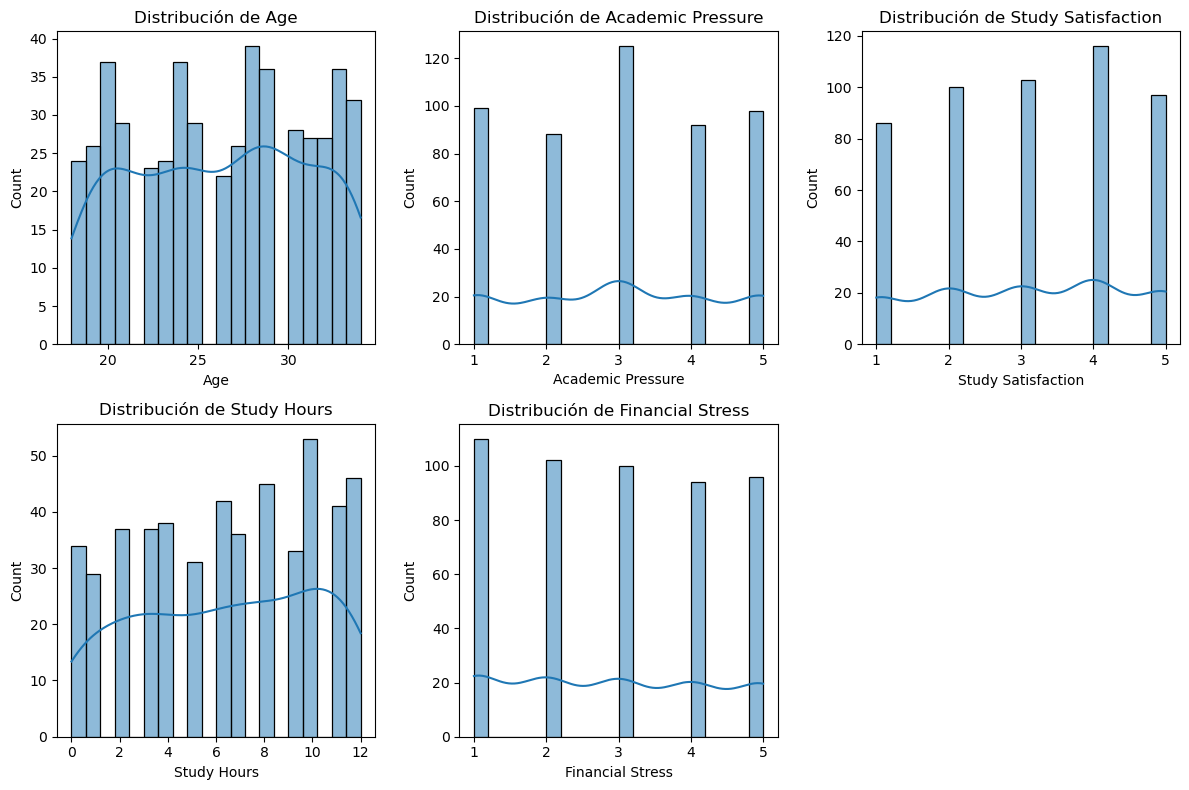

In [10]:
# Visualización de distribuciones de variables numéricas
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.show()


In [11]:
# Estadísticas descriptivas ampliadas
print(df.describe())


              Age  Academic Pressure  Study Satisfaction  Study Hours  \
count  502.000000         502.000000          502.000000   502.000000   
mean    26.241036           3.003984            3.075697     6.404382   
std      4.896501           1.390007            1.373490     3.742434   
min     18.000000           1.000000            1.000000     0.000000   
25%     22.000000           2.000000            2.000000     3.000000   
50%     26.500000           3.000000            3.000000     7.000000   
75%     30.000000           4.000000            4.000000    10.000000   
max     34.000000           5.000000            5.000000    12.000000   

       Financial Stress  
count        502.000000  
mean           2.928287  
std            1.425053  
min            1.000000  
25%            2.000000  
50%            3.000000  
75%            4.000000  
max            5.000000  


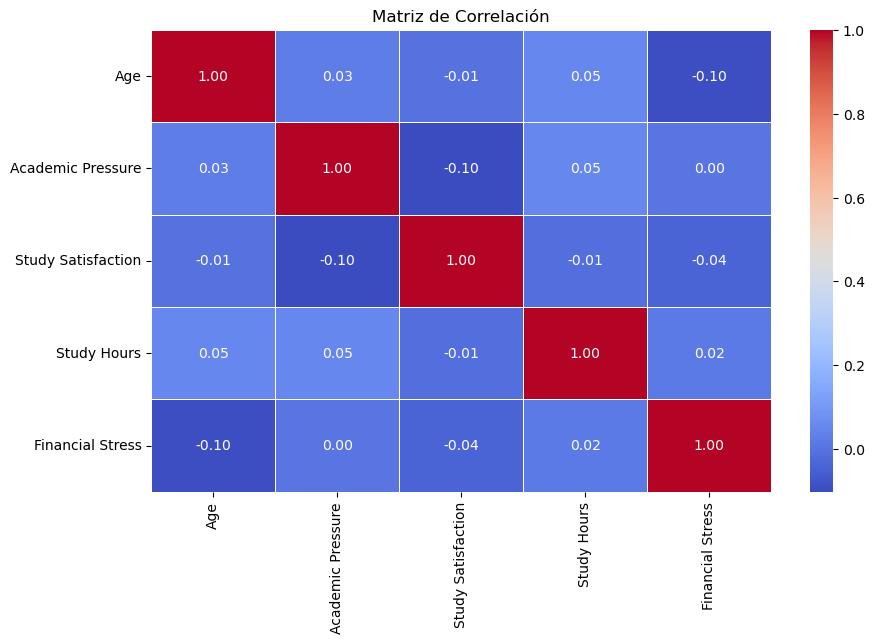

In [12]:
# Matriz de correlación para ver las relaciones entre las variables numéricas
correlation_matrix = df[numerical_columns].corr()

# Crear un mapa de calor de la correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


In [13]:
# Codificar variables categóricas como Gender y Family History of Mental Illness
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'No': 0, 'Yes': 1})

# Verificar si hay valores nulos después de la codificación
print(df.isnull().sum())


Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [14]:
from sklearn.preprocessing import StandardScaler

# Definir las columnas numéricas para escalar
numerical_columns = ['Age', 'Academic Pressure', 'Study Satisfaction', 'Study Hours', 'Financial Stress']

# Aplicar escalado
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Verificación de los datos escalados
print(df[numerical_columns].head())


        Age  Academic Pressure  Study Satisfaction  Study Hours  \
0  0.359587          -0.723007            0.673631     0.694256   
1  0.359587           0.717269            1.402429     0.159311   
2 -0.253706          -1.443146           -0.055168     0.961728   
3 -0.662569          -1.443146            0.673631     0.159311   
4  0.972881          -1.443146            1.402429    -0.643106   

   Financial Stress  
0         -0.652055  
1         -1.354484  
2          0.752802  
3         -0.652055  
4         -0.652055  


In [15]:
from sklearn.model_selection import train_test_split

# Definir variables predictoras (X) y objetivo (y)
X = df.drop(columns=['Depression'])
y = df['Depression']  # Suponiendo que esta es la variable objetivo

# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")


Conjunto de entrenamiento: (401, 10)
Conjunto de prueba: (101, 10)


In [18]:
# Revisar las primeras filas de las columnas que parecen tener texto
print(df['Study Hours'].unique())


[ 0.69425592  0.15931122  0.96172827 -0.64310583 -1.44552288 -0.10816113
 -0.91057818  1.22920062 -1.17805053  1.49667297  0.42678357 -1.71299523
 -0.37563348]


In [32]:
# Mapeo de las categorías en Study Hours a valores numéricos
df['Study Hours'] = df['Study Hours'].replace({
    'Less than 2 hours': 1,
    '2 to 4 hours': 3,
    '4 to 6 hours': 5,
    '6 to 8 hours': 7,
    'More than 8 hours': 9
})

# Verificar la conversión
print(df['Study Hours'].unique())


[ 0.69425592  0.15931122  0.96172827 -0.64310583 -1.44552288 -0.10816113
 -0.91057818  1.22920062 -1.17805053  1.49667297  0.42678357 -1.71299523
 -0.37563348]


In [24]:
# Eliminar espacios adicionales de los nombres de las columnas
df.columns = df.columns.str.strip()


In [37]:
# Limpiar posibles espacios y convertir a minúsculas para las columnas categóricas
df['Gender'] = df['Gender'].astype(str).str.strip().str.lower()
df['Dietary Habits'] = df['Dietary Habits'].astype(str).str.strip().str.lower()
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].astype(str).str.strip().str.lower()
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].astype(str).str.strip().str.lower()

# Ahora revisamos si hay valores nulos
print(df.isna().sum())

# Rellenamos los valores nulos con la moda
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Dietary Habits'] = df['Dietary Habits'].fillna(df['Dietary Habits'].mode()[0])
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].fillna(df['Have you ever had suicidal thoughts ?'].mode()[0])
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].fillna(df['Family History of Mental Illness'].mode()[0])

# Comprobar después de la imputación
print(df.isna().sum())




Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64
Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [38]:
# Ahora que tenemos valores válidos en las columnas, procedemos con la codificación
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})
df['Dietary Habits'] = df['Dietary Habits'].map({'good': 1, 'bad': 0})
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'no': 0, 'yes': 1})
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'no': 0, 'yes': 1})

# Verificamos los resultados finales
print(df[['Gender', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']].head())


   Gender  Dietary Habits  Have you ever had suicidal thoughts ?  \
0     NaN             NaN                                    NaN   
1     NaN             NaN                                    NaN   
2     NaN             NaN                                    NaN   
3     NaN             NaN                                    NaN   
4     NaN             NaN                                    NaN   

   Family History of Mental Illness  
0                               NaN  
1                               NaN  
2                               NaN  
3                               NaN  
4                               NaN  


In [31]:
# Mostrar las primeras filas del DataFrame
print(df.head())


   Gender       Age  Academic Pressure  Study Satisfaction     Sleep Duration  \
0     NaN  0.359587          -0.723007            0.673631          7-8 hours   
1     NaN  0.359587           0.717269            1.402429          5-6 hours   
2     NaN -0.253706          -1.443146           -0.055168          5-6 hours   
3     NaN -0.662569          -1.443146            0.673631  More than 8 hours   
4     NaN  0.972881          -1.443146            1.402429  More than 8 hours   

   Dietary Habits  Have you ever had suicidal thoughts ?  Study Hours  \
0             NaN                                    NaN     0.694256   
1             NaN                                    NaN     0.159311   
2             NaN                                    NaN     0.961728   
3             NaN                                    NaN     0.159311   
4             NaN                                    NaN    -0.643106   

   Financial Stress  Family History of Mental Illness Depression  
0      

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Inicializar modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier()
}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros a optimizar para un modelo (por ejemplo, Logistic Regression)
param_grid = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10]},
    'KNN': {'n_neighbors': [3, 5, 7, 9]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30]},
    'XGBoost': {'learning_rate': [0.01, 0.1, 0.5]},
    'LightGBM': {'num_leaves': [31, 50, 100]}
}

# Buscar los mejores hiperparámetros
for name, model in models.items():
    print(f"Optimizing {name}...")
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print(f"Best Accuracy: {grid_search.best_score_}")